In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


In [2]:
import pandas as pd

# Read the text file
                   
df = pd.read_csv('../DataCollection/Calibration_1_30_2024/Calibration_1_30_2024.txt')  # replace '\t' with your delimiter

# Save the DataFrame as a CSV file
df.to_csv('../DataCollection/Calibration_1_30_2024/Calibration_1_30_2024.csv', index=False)

df.head()  # prints the first 5 rows of the DataFrame

,Timestamp,Mode,Data
0,15:10:47.923,RX,Differential Pressure values:
1,15:10:47.923,RX,-0.42
2,15:10:47.923,RX,Pressure values:
3,15:10:47.923,RX,9890.30
4,15:10:48.101,RX,Differential Pressure values:


In [3]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
df['differential pressure value'] = np.where(df['Data'] == 'Differential Pressure values:', df['Data'].shift(-1), np.nan)
df['pressure values'] = np.where(df['Data'] == 'Pressure values:', df['Data'].shift(-1), np.nan)

# Fill NaN values
df['differential pressure value'].fillna(method='ffill', inplace=True)
df['pressure values'].fillna(method='ffill', inplace=True)

In [4]:
df.head(100)  # prints the first 5 rows of the DataFrame

,Timestamp,Mode,Data,differential pressure value,pressure values
0,15:10:47.923,RX,Differential Pressure values:,-0.42,NaN
1,15:10:47.923,RX,-0.42,-0.42,NaN
2,15:10:47.923,RX,Pressure values:,-0.42,9890.30
3,15:10:47.923,RX,9890.30,-0.42,9890.30
4,15:10:48.101,RX,Differential Pressure values:,-0.42,9890.30
...,...,...,...,...,...
95,15:10:51.432,RX,9890.30,-0.12,9890.30
96,15:10:51.582,RX,Differential Pressure values:,-0.02,9890.30
97,15:10:51.582,RX,-0.02,-0.02,9890.30
98,15:10:51.582,RX,Pressure values:,-0.02,9890.30


In [5]:
import pandas as pd

# Assuming df is your DataFrame

# Find rows where any cell has a NaN value
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)
# Drop rows where any cell has a NaN value
df = df.dropna()

      Timestamp Mode                           Data  \
0  15:10:47.923   RX  Differential Pressure values:   
1  15:10:47.923   RX                          -0.42   

  differential pressure value pressure values  
0                       -0.42             NaN  
1                       -0.42             NaN  


In [6]:
df.head()

,Timestamp,Mode,Data,differential pressure value,pressure values
2,15:10:47.923,RX,Pressure values:,-0.42,9890.30
3,15:10:47.923,RX,9890.30,-0.42,9890.30
4,15:10:48.101,RX,Differential Pressure values:,-0.42,9890.30
5,15:10:48.102,RX,-0.42,-0.42,9890.30
6,15:10:48.103,RX,Pressure values:,-0.42,9890.60


In [7]:
df.tail()

,Timestamp,Mode,Data,differential pressure value,pressure values
26864,15:27:45.520,RX,Differential Pressure values:,67.77,9958.20
26865,15:27:45.521,RX,67.77,67.77,9958.20
26866,15:27:45.521,RX,Pressure values:,67.77,9958.30
26867,15:27:45.551,RX,9958.30,67.77,9958.30
26868,15:27:45.670,RX,Differential Pressure values:,67.77,9958.30


In [8]:

df.to_csv('../DataCollection/Calibration_1_30_2024/Calibration_1_30_2024.csv', index=False)

df.head()  # prints the first 5 rows of the DataFrame 

,Timestamp,Mode,Data,differential pressure value,pressure values
2,15:10:47.923,RX,Pressure values:,-0.42,9890.30
3,15:10:47.923,RX,9890.30,-0.42,9890.30
4,15:10:48.101,RX,Differential Pressure values:,-0.42,9890.30
5,15:10:48.102,RX,-0.42,-0.42,9890.30
6,15:10:48.103,RX,Pressure values:,-0.42,9890.60


In [9]:
df.tail()

,Timestamp,Mode,Data,differential pressure value,pressure values
26864,15:27:45.520,RX,Differential Pressure values:,67.77,9958.20
26865,15:27:45.521,RX,67.77,67.77,9958.20
26866,15:27:45.521,RX,Pressure values:,67.77,9958.30
26867,15:27:45.551,RX,9958.30,67.77,9958.30
26868,15:27:45.670,RX,Differential Pressure values:,67.77,9958.30


In [10]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])



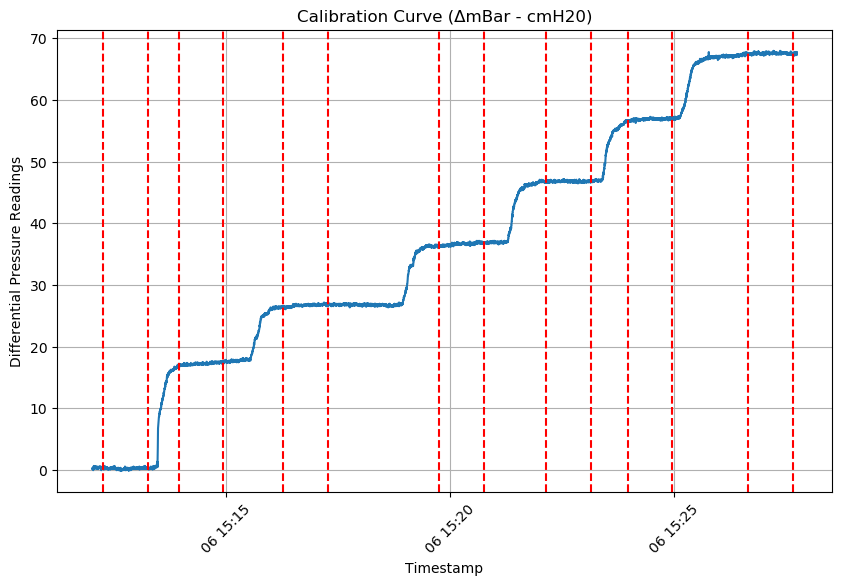

In [11]:

# Define start and end time
start_time = pd.to_datetime('15:12:00')
end_time = pd.to_datetime('15:27:45')

# Filter rows between start time and end time
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df['Timestamp'] >= start_time) & (filtered_df['Timestamp'] <= end_time)]

filtered_df = filtered_df.copy()
# Now you can modify 'pressure values' without warnings
filtered_df.loc[:, 'differential pressure value'] = pd.to_numeric(filtered_df['differential pressure value'], errors='coerce')

# Define the times to plot vertical lines at
times = ['15:12:15', '15:13:15', '15:13:56', '15:14:56', '15:16:16', '15:17:16', '15:19:45', '15:20:45', '15:22:09', '15:23:09', '15:23:58', '15:24:58', '15:26:40', '15:27:40']
labels = ['0 cm H20', '1 cm H20', '2 cm H20', '3 cm H20', '4 cm H20', '5 cm H20', '6 cm H20']

# Convert the times to datetime
times = [pd.to_datetime(t) for t in times]

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 6))

# Plot 'Data' against 'Timestamp'
plt.plot(filtered_df['Timestamp'], filtered_df['differential pressure value'])

# Plot vertical lines at the specified times
for i, t in enumerate(times):
     plt.axvline(x=t, color='r', linestyle='--')
#     if i % 2 == 0:  # for the first, third, fifth, etc. lines
#         plt.text(t, 75, labels[i//2], rotation=90, va='bottom', ha='right')  # adjust -5 and 'bottom' as needed

# Set the title and labels
plt.title('Calibration Curve (ΔmBar - cmH20)')
plt.xlabel('Timestamp')
plt.ylabel('Differential Pressure Readings')

# Adjust the spacing of the labels
plt.xticks(rotation=45)

# Set the y-axis limits to cover the entire range
#plt.ylim(float('-5'), float('90'))

# Add a grid
plt.grid(True)

plt.savefig('Calibration_1_30_2024.png')
# Show the plot
plt.show()

Slope: 10.76
Intercept: 9894.43
R-squared: 0.9930


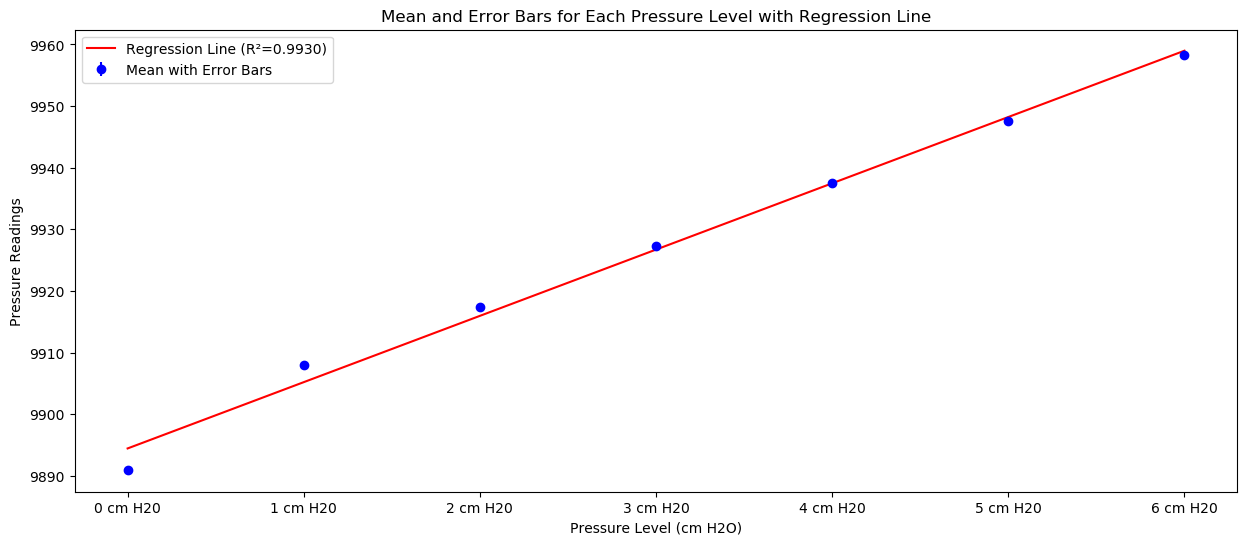

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Define start and end time
start_time = pd.to_datetime('15:12:00')
end_time = pd.to_datetime('15:27:45')

# Filter rows between start time and end time
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df['Timestamp'] >= start_time) & (filtered_df['Timestamp'] <= end_time)]

# Convert 'differential pressure value' to numeric, handling errors
filtered_df.loc[:, 'pressure values'] = pd.to_numeric(filtered_df['pressure values'], errors='coerce')

# Define the times to plot vertical lines at
times = ['15:12:15', '15:13:15', '15:13:56', '15:14:56', '15:16:16', '15:17:16', '15:19:45', '15:20:45', '15:22:09', '15:23:09', '15:23:58', '15:24:58', '15:26:40', '15:27:40']
labels = ['0 cm H20', '1 cm H20', '2 cm H20', '3 cm H20', '4 cm H20', '5 cm H20', '6 cm H20']

# Convert the times to datetime
times = [pd.to_datetime(t) for t in times]

# Initialize lists to store mean and std values for each pressure level
mean_values = []
std_values = []

# Loop through each pressure level
for i in range(0, len(times)-1, 2):
    # Filter data for the specific time interval
    pressure_level_data = filtered_df[(filtered_df['Timestamp'] >= times[i]) & (filtered_df['Timestamp'] <= times[i+1])]
    
    # Calculate mean and std for the filtered data
    mean_value = pressure_level_data['pressure values'].mean()
    std_value = pressure_level_data['pressure values'].std()
    
    # Append mean and std values to the lists
    mean_values.append(mean_value)
    std_values.append(std_value)


# Perform linear regression to fit a line
slope, intercept, r_value, p_value, std_err = linregress(range(len(labels)), mean_values)

# Calculate R-squared
r_squared = r_value**2

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(15, 6))

# Plot mean values with error bars
plt.errorbar(labels, mean_values, yerr=std_values, fmt='o', color='b', label='Mean with Error Bars')

# Plot the regression line
plt.plot(labels, [intercept + slope * i for i in range(len(labels))], color='r', label=f'Regression Line (R²={r_squared:.4f})')

# Set the title and labels
plt.title('Mean and Error Bars for Each Pressure Level with Regression Line')
plt.xlabel('Pressure Level (cm H2O)')
plt.ylabel('Pressure Readings')

# Add a legend
plt.legend()



# Display the calculated values
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_squared:.4f}')


plt.savefig('Calibration_1_30_2024_2.png')

plt.show()